,土地移轉總面積(平方公尺),建物現況格局-廳,建物現況格局-房,建物現況格局-衛,建物移轉總面積(平方公尺),總價(元),車位移轉總面積(平方公尺),車位總價(元),num_of_bus_stations_in_100m,income_avg,...,建物型態,建物現況格局-隔間,有無管理組織,車位類別,都市土地使用分區,鄉鎮市區,非都市土地使用分區,location_type,nearest_tarin_station,單價(元/平方公尺)
0,2.364366,-1.567971,-1.419390,-1.495833,-1.353538,-0.910140,-0.539096,-0.389257,-1.429543,0.102731,...,2,0,1,1,1,6,1,1,40,60870.0
1,0.631359,0.810838,-0.732958,-0.343334,-0.343538,-0.661491,-0.539096,-0.389257,1.772410,-0.432691,...,1,0,1,1,0,1,1,3,39,117550.0
2,2.364366,0.810838,1.326338,2.537915,2.297815,2.232775,2.427249,-0.389257,1.132019,0.450769,...,0,0,0,4,0,5,1,2,23,231650.0
3,0.297232,0.810838,0.639906,0.809166,-0.095638,-0.443924,-0.539096,-0.389257,-0.148762,-0.435469,...,1,0,1,1,0,9,1,3,52,127419.0
4,-0.977402,0.810838,-0.046526,-0.343334,-0.678820,-0.319600,-0.539096,-0.389257,-1.429543,-0.729956,...,0,0,0,1,2,0,1,3,82,272743.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69160,0.272977,0.810838,0.639906,0.809166,0.692464,0.226183,-0.539096,-0.389257,-0.148762,-0.596604,...,6,0,1,4,0,9,1,3,71,140892.0
69161,1.153093,-1.567971,-1.419390,-1.495833,-1.353538,-1.233196,-0.539096,-0.389257,-0.789153,2.352430,...,2,0,1,1,1,6,1,3,64,15810.0
69162,-1.059573,0.810838,-0.732958,-0.343334,-0.780093,-0.568248,-0.539096,-0.389257,-0.148762,-0.488255,...,3,0,0,1,2,0,1,3,58,238095.0
69163,-0.240837,0.810838,0.639906,0.809166,0.154042,0.208778,-0.539096,-0.389257,-0.148762,-0.196546,...,6,0,1,1,0,0,1,3,82,189006.0


Coefficients: [-2.45629732e+04 -2.62095512e+03 -5.93142328e+03  8.32954067e+03
 -1.12381384e+05  1.51097866e+05  2.14884236e+03  3.60808434e+03
  6.12098369e+02  2.61593548e+03  2.56485209e+02  2.77754138e+03
 -4.25513943e+03 -1.12731570e+03  8.45734069e+03 -2.13510140e+03
 -1.26321233e+03  3.80749185e+03  4.44024628e+03  2.50169763e+03
 -6.45556119e+03 -5.96461578e+03 -2.75366198e+03  1.35210432e+03
  2.76228115e+04 -6.29206068e+00  2.69702585e+03  6.51072825e+03
  1.16816424e+04 -1.05793985e+04 -1.81762264e+03 -6.42822856e+01
 -4.01681791e+04 -3.35238794e+03 -9.56922026e+00]

Mean squared error: 88045.676907015
Variance score: 0.4662094315063998


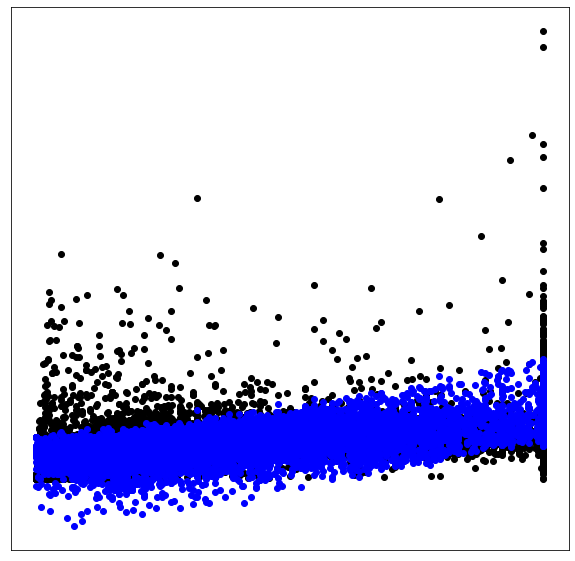

In [1]:
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

df_train = pd.read_csv('data/output/house_train_clean.csv')
display(df_train)


df_train_y = df_train['單價(元/平方公尺)']
df_train = df_train.drop(['單價(元/平方公尺)'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(df_train, df_train_y, test_size=0.2, random_state=1)
#Build Linear regression model
model = linear_model.LinearRegression()

# Train the model using the training sets
model.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(x_test)

# The coefficients
print(f'Coefficients: {model.coef_}\n')
# The mean squared error
print(f"Mean squared error: {mean_squared_error(y_test, y_pred,squared=False)}") 
# Explained variance score: 1 is perfect prediction
print(f'Variance score: {r2_score(y_test, y_pred)}')
                                      
# # Plot outputs
plt.figure(figsize=(10,10))
plt.scatter(x_test['總價(元)'], y_test,  color='black')
plt.scatter(x_test['總價(元)'], y_pred, color='blue')

plt.xticks(())
plt.yticks(())

plt.show()